In [1]:
import io

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


# Loading data

In [2]:
# # Create a symlink to the data file so that the notebook is in the same
# # directory as the file

# # When submitting, simply delete this cell

# data_path = '/content/drive/My\\ Drive/Documents/HCMUS/Trực\\ quan\\ hóa\\ dữ\\ liệu/Lab\\ 3/household_power_consumption.txt'
# !ln -s $data_path

In [3]:
# # Check which lines contain data from 2007-02-01 to 2007-02-02

# # Number of lines
# num_lines = !wc -l "household_power_consumption.txt" | sed 's/\([0-9]*\).*/\1/'
# num_lines = int(num_lines[0]) - 1

# # Index of the first line containing 1/2/2007
# start = !grep -n -m 1 "1/2/2007" "household_power_consumption.txt" | sed 's/\([0-9]*\).*/\1/'

# # Minus 1 because grep counts from 1
# start = int(start[0]) - 1

# # Index of the last line contaning 2/2/2007
# end = !grep -n "^2/2/2007" "household_power_consumption.txt" | tail -1 | sed 's/\([0-9]*\).*/\1/'
# end = int(end[0]) - 1

# num_lines, start, end

In [4]:
# # Which lines of the file to keep
# keep_rows = np.arange(start, end+1)
# keep_rows

In [5]:
# df = pd.read_csv(
#     'household_power_consumption.txt',
#     delimiter=';',
#     na_values='?',
#     header=None,
#     skiprows=lambda x: x not in keep_rows,
# )
# df

In [6]:
# # header = !head -1 "household_power_consumption.txt"
# header = open('household_power_consumption.txt').readline()
# # header = header[0]
# header = header.split(';')
# header

In [7]:
# df.columns = header
# df.head()

In [8]:
file_io = open('household_power_consumption.txt')
header = file_io.readline()
columns = header.strip().split(';')

sliced = ''
for line in file_io:
    if line.startswith('1/2/2007') or line.startswith('2/2/2007'):
        sliced += line

In [9]:
df = pd.read_csv(io.StringIO(sliced), na_values='?', delimiter=';', header=None)
df.columns = columns
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [10]:
df.shape

(2880, 9)

# Preprocessing

In [11]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [12]:
date_time_join = df[['Date', 'Time']].apply(
    func=lambda x: ' '.join([x['Date'], x['Time']]),
    axis=1
)

df['Timestamp'] = pd.to_datetime(date_time_join, dayfirst=True)
df.drop(columns=['Date', 'Time'], inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp
0,0.326,0.128,243.15,1.4,0.0,0.0,0.0,2007-02-01 00:00:00
1,0.326,0.130,243.32,1.4,0.0,0.0,0.0,2007-02-01 00:01:00
2,0.324,0.132,243.51,1.4,0.0,0.0,0.0,2007-02-01 00:02:00
3,0.324,0.134,243.90,1.4,0.0,0.0,0.0,2007-02-01 00:03:00
4,0.322,0.130,243.16,1.4,0.0,0.0,0.0,2007-02-01 00:04:00


In [13]:
df.describe(include='datetime')

C:\Users\Nam Mai\AppData\Local\Temp\ipykernel_5224\2102073941.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime')


,Timestamp
count,2880
unique,2880
top,2007-02-01 00:00:00
freq,1
first,2007-02-01 00:00:00
last,2007-02-02 23:59:00


# Plotting

In [14]:
def plot_gap_hist(fig, ax):
    """Plot historgram of Global Active Power (plot 1)
    """
    ax.hist(
        df['Global_active_power'],
        bins=np.arange(0, 8, 0.5),
        color='red',
        edgecolor='black',
    )

    ax.set_title('Global Active Power', fontdict={'fontweight': 'bold'})
    ax.set_xlabel('Global Active Power (kilowatts)')
    ax.set_ylabel('Frequency')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    return ax

<AxesSubplot:title={'center':'Global Active Power'}, xlabel='Global Active Power (kilowatts)', ylabel='Frequency'>

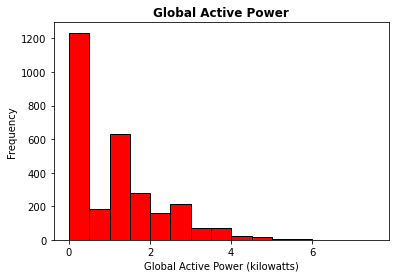

In [15]:
fig1, ax1 = plt.subplots()
plot_gap_hist(fig1, ax1)

In [16]:
def set_weekday(axis):
    axis.set_major_locator(WeekdayLocator(byweekday=(1, 2, 3, 4, 5, 6, 7)))
    axis.set_major_formatter(DateFormatter('%a'))

In [17]:
def plot_gap_time(fig, ax):
    """Plot Global Active Power against timestamp (plot 2)
    """
    ax.plot(
        df['Timestamp'], df['Global_active_power'],
        color='black',
        linewidth=0.75,
    )

    ax.set_ylabel('Global Active Power (kilowatts)')
    # ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(1, 2, 3, 4, 5, 6, 7)))
    # ax.xaxis.set_major_formatter(DateFormatter('%a'))
    set_weekday(ax.xaxis)
    return ax

<AxesSubplot:ylabel='Global Active Power (kilowatts)'>

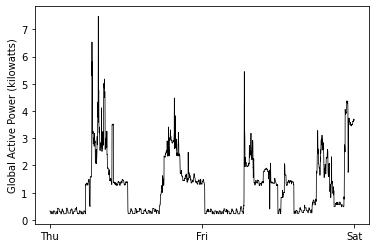

In [18]:
fig2, ax2 = plt.subplots()
plot_gap_time(fig2, ax2)

In [19]:
def plot_esm_time(fig, ax):
    """Plot Energy Sub Metering against time (plot 3)
    """
    ax.plot(
        df['Timestamp'], df['Sub_metering_1'],
        color='black',
        linewidth=0.75,
    )

    ax.plot(
        df['Timestamp'], df['Sub_metering_2'],
        color='red',
        linewidth=0.75,
    )

    ax.plot(
        df['Timestamp'], df['Sub_metering_3'],
        color='blue',
        linewidth=0.75,
    )

    ax.legend(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
    ax.set_ylabel('Energy sub metering')
    # ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(1, 2, 3, 4, 5, 6, 7)))
    # ax.xaxis.set_major_formatter(DateFormatter('%a'))
    set_weekday(ax.xaxis)
    return ax

<AxesSubplot:ylabel='Energy sub metering'>

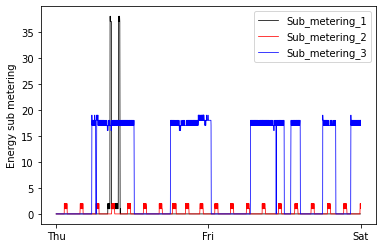

In [20]:
fig3, ax3 = plt.subplots()
plot_esm_time(fig3, ax3)

<AxesSubplot:ylabel='Voltage'>

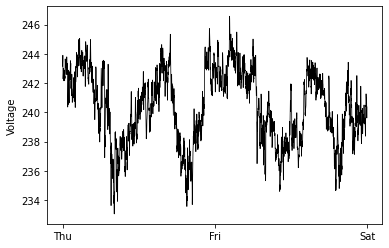

In [21]:
def plot_voltage_time(fig, ax):
    ax.plot(
        df['Timestamp'], df['Voltage'],
        color='black',
        linewidth=0.75,
    )

    set_weekday(ax.xaxis)
    ax.set_ylabel('Voltage')
    return ax
fig, ax = plt.subplots()
plot_voltage_time(fig, ax)

In [22]:
def plot_grp_time(fig, ax):
    ax.plot(
        df['Timestamp'], df['Global_reactive_power'],
        color='black',
        linewidth=0.75,
    )

    ax.set_ylabel('Global Reactive Power')
    set_weekday(ax.xaxis)
    return ax

<AxesSubplot:ylabel='Global Reactive Power'>

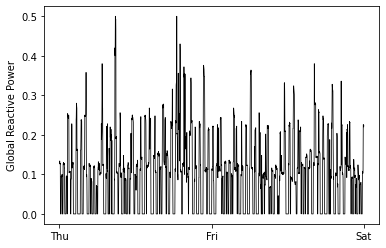

In [23]:
fig, ax = plt.subplots()
plot_grp_time(fig, ax)

In [24]:
def plot1():
    fig, ax = plt.subplots()
    plot_gap_hist(fig, ax)
    fig.savefig('plot1.png')

In [25]:
def plot2():
    fig, ax = plt.subplots()
    plot_gap_time(fig, ax)
    fig.savefig('plot2.png')

In [26]:
def plot3():
    fig, ax = plt.subplots()
    plot_esm_time(fig, ax)
    fig.savefig('plot3.png')

In [27]:
def plot4():
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    plot_gap_time(fig, axes[0][0])
    plot_voltage_time(fig, axes[0][1])
    plot_esm_time(fig, axes[1][0])
    plot_grp_time(fig, axes[1][1])
    fig.tight_layout(pad=3)

    fig.savefig('plot4.png')

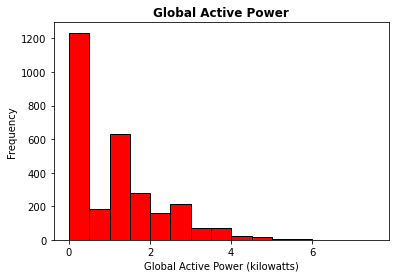

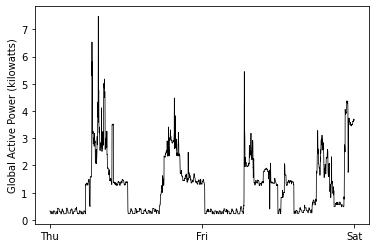

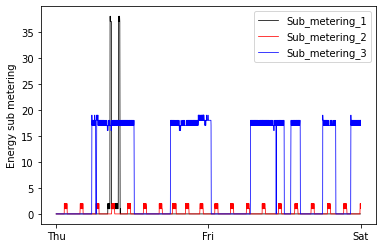

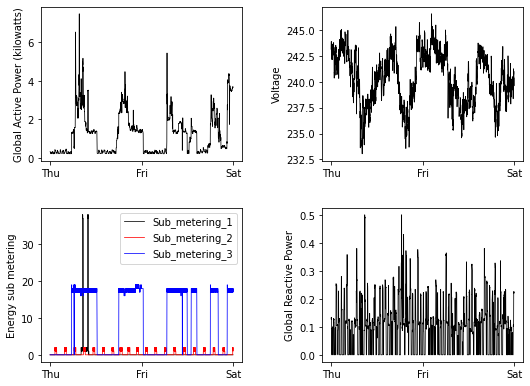

In [28]:
plot1()
plot2()
plot3()
plot4()